In [2]:
!pip install tensorflow-cpu


Defaulting to user installation because normal site-packages is not writeable
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached certifi-2025.1.31-py3-none-any.whl.metadata (2.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.8/251.8 MB 4.9 MB/s eta 0:00:00m eta 0:00:010:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 9.8 MB/s eta 0:00:006 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 6.3 MB/s eta 0:00:005.6 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 10.1 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 4.7 MB/s eta 0:00:0010.3 MB/s eta 0:00:01
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.

In [ ]:
import os
import json
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# ------------------------------
# Step 1: Load the Keras Model (.keras format)
# ------------------------------
model = keras.models.load_model("model/water_bottle.keras")  # ✅ Replace with actual path

# ------------------------------
# Step 2: Get Class Labels
# Option A: Load from training directory used for model training
# ------------------------------
train_data_dir = "/home/raghavendra/AAAA/Second Semester/PE-KURIAN_SIR/WEEKLY_SUBMISSIONS/Project_deployment/PE_KURIAN_SIR/iiitb_server/model_build_based_on_input/mobile_net/database/"  # ✅ Replace with path used during training
datagen = ImageDataGenerator()
train_generator = datagen.flow_from_directory(train_data_dir)
class_indices = train_generator.class_indices  # {'cat': 0, 'dog': 1, ...}
labels = list(class_indices.keys())

# Optional: Save labels for reuse
with open("class_labels.json", "w") as f:
    json.dump(labels, f)

# ------------------------------
# Step 3: Predict Image Label
# ------------------------------


Found 2817 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
✅ Prediction: BOTTLE


'BOTTLE'

In [15]:
import os
l =  os.listdir("model")
l

['model .keras', 'water_bottle.keras', 'needed_urgent.h5', '1.keras']

In [23]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tensorflow.keras.models import load_model

# ✅ Load the saved model
model = load_model("model/model.keras")

# ✅ Load and preprocess an image
for i in os.listdir("testing_photos"):
    img_path = os.path.join("testing_photos",i)
    print("Image path: ",img_path)
    img = load_img(img_path, target_size=(224, 224))  # Resize to match model input size
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # ✅ Make prediction
    predictions = model.predict(img_array)[0][0]  # Extract scalar value from array
    predictions1 = model.predict(img_array)
    print(predictions1)

    # ✅ Define class labels (from your dataset)
    class_labels = ["BOTTLE", "NO"]  # Modify based on your class names

    # ✅ Determine predicted class
    predicted_class = class_labels[int(predictions > 0.5)]  # Threshold for binary classification

    # ✅ Print result
    print(f"Predicted Class: {predicted_class}")
    print(f"Confidence Score: {predictions:.4f}")

/home/raghavendra/.local/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 62 variables whereas the saved optimizer has 122 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Image path:  testing_photos/E7.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
[[0.16522361]]
Predicted Class: BOTTLE
Confidence Score: 0.1652
Image path:  testing_photos/r3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
[[1.]]
Predicted Class: NO
Confidence Score: 1.0000
Image path:  testing_photos/s4.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
[[1.]]
Predicted Class: NO
Confidence Score: 1.0000
Image path:  testing_photos/E9.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
[[0.16522361]]
Predicted Class: BOTTLE
Confidence Score: 0.1652
Image path:  testing_photos/r4.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
[[1.]]
Predicted Class: NO
Confidence Score: 1.0000
Image path:  testing_photos/s3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
[[1.]]
Predicted Class: NO
Confidence Score: 

In [8]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model("model/my_model.h5")

In [29]:
import time
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os
import cv2

# ✅ Load and preprocess an image
li = os.listdir("captured_images")
for i in li: 
    
    print(i)
    
    img = load_img("captured_images/"+i, target_size=(224, 224))  # Resize to match model input size
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # ✅ Measure inference time
    start_time = time.time()  # Start timer
    predictions = model.predict(img_array)[0][0]  # Perform inference
    end_time = time.time()  # End timer

    # ✅ Calculate elapsed time
    inference_time = (end_time - start_time) * 1000  # Convert to milliseconds

    # ✅ Define class labels
    class_labels = ["pen","No"]
    predicted_class = class_labels[int(predictions > 0.5)]

    # ✅ Print results
    print(f"Predicted Class: {predicted_class}")
    print(f"Confidence Score: {predictions:.4f}")
    print(f"Inference Time: {inference_time:.2f} ms")
    print("\n\n")


baloon.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted Class: No
Confidence Score: 0.8578
Inference Time: 135.59 ms



raghavendra_samy.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Predicted Class: pen
Confidence Score: 0.0119
Inference Time: 165.14 ms



raghavendra_swamy.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted Class: pen
Confidence Score: 0.0025
Inference Time: 149.80 ms



pen.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted Class: No
Confidence Score: 0.9998
Inference Time: 143.52 ms



raghevndra_swamy.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predicted Class: pen
Confidence Score: 0.0117
Inference Time: 122.72 ms



pen_1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted Class: No
Confidence Score: 0.9995
Inference Time: 138.72 ms





1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


error: OpenCV(4.11.0) /io/opencv/modules/highgui/src/window.cpp:1367: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvWaitKey'


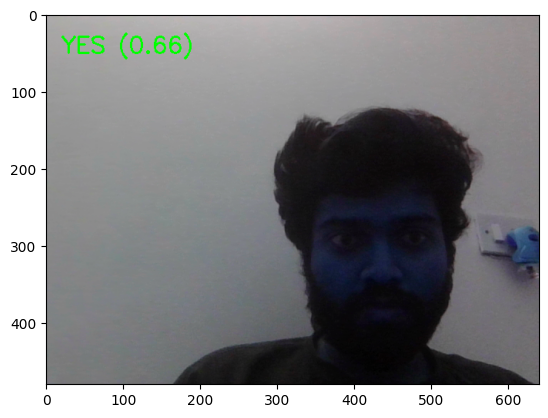

In [24]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt


# ✅ Load the trained model
model = load_model("model/my_model.h5")  # Change path if needed

# ✅ Define class labels (modify as per your dataset)
class_labels = ["NO", "YES"]  # Adjust based on your model's classes

# ✅ Open video feed (0 for webcam, or use "video.mp4" for a video file)
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # Stop if no frame is captured
    
    # ✅ Preprocess the frame
    frame_resized = cv2.resize(frame, (224, 224))  # Resize to match model input
    frame_array = img_to_array(frame_resized) / 255.0  # Normalize
    frame_array = np.expand_dims(frame_array, axis=0)  # Add batch dimension

    # ✅ Make prediction
    prediction = model.predict(frame_array)[0][0]  # Extract scalar value
    predicted_class = class_labels[int(prediction > 0.5)]  # Binary classification

    # ✅ Display the result on the video
    label = f"{predicted_class} ({prediction:.2f})"
    cv2.putText(frame, label, (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # ✅ Show the frame
    plt.imshow(frame)
#    cv2.imshow("Live Prediction", frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# ✅ Release resources
cap.release()
cv2.destroyAllWindows()


In [7]:
import cv2
cap = cv2.VideoCapture(0)
cap.release()
#cv2.destroyAllWindows()

[ WARN:1@1613.761] global ./modules/videoio/src/cap_gstreamer.cpp (2401) handleMessage OpenCV | GStreamer warning: Embedded video playback halted; module v4l2src6 reported: Device '/dev/video0' is busy
[ WARN:1@1613.761] global ./modules/videoio/src/cap_gstreamer.cpp (1356) open OpenCV | GStreamer warning: unable to start pipeline
[ WARN:1@1613.761] global ./modules/videoio/src/cap_gstreamer.cpp (862) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created
[ WARN:1@1613.761] global ./modules/videoio/src/cap_v4l.cpp (902) open VIDEOIO(V4L2:/dev/video0): can't open camera by index


In [14]:
import cv2
print(cv2.getBuildInformation())



General configuration for OpenCV 4.11.0 =====================================
  Version control:               4.11.0

  Platform:
    Timestamp:                   2025-01-16T09:53:09Z
    Host:                        Linux 5.15.0-1074-azure x86_64
    CMake:                       3.31.1
    CMake generator:             Unix Makefiles
    CMake build tool:            /bin/gmake
    Configuration:               Release
    Algorithm Hint:              ALGO_HINT_ACCURATE

  CPU/HW features:
    Baseline:                    SSE SSE2 SSE3
      requested:                 SSE3
    Dispatched code generation:  SSE4_1 SSE4_2 AVX FP16 AVX2 AVX512_SKX
      SSE4_1 (16 files):         + SSSE3 SSE4_1
      SSE4_2 (1 files):          + SSSE3 SSE4_1 POPCNT SSE4_2
      AVX (8 files):             + SSSE3 SSE4_1 POPCNT SSE4_2 AVX
      FP16 (0 files):            + SSSE3 SSE4_1 POPCNT SSE4_2 AVX FP16
      AVX2 (36 files):           + SSSE3 SSE4_1 POPCNT SSE4_2 AVX FP16 AVX2 FMA3
      AVX512_SKX (5 

In [12]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from video_record_send_to_mail.index import execute_record
import threading
import cv2
from datetime import datetime

class Inference:
    def __init__(self):
        self.model = tf.keras.models.load_model("model/model.keras")  # Load your model
        print("Model Loaded Successfully\n")

    def inference(self, img):
        img = cv2.resize(img, (224, 224))

        # Convert image to array and normalize pixel values to [0,1]
        img_array = img_to_array(img) / 255.0  
        img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match model input

        # ✅ Step 3: Make prediction
        prediction = self.model.predict(img_array)  # Get the output prediction

        # ✅ Step 4: Interpret the prediction result
        class_labels = ["NO", "pen"]  # Modify based on your class labels
        predicted_class = class_labels[int(prediction[0][0] > 0.5)]  # Assuming binary classification
        print("Class:", predicted_class)

        if predicted_class == "pen":
            threading.Thread(target=execute_record, args=("hlgsagar.2@gmail.com",)).start()

if __name__ == "__main__":
    inf = Inference()
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Error: Could not open camera.")
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        inf.inference(frame)  # Run inference on the captured frame
        cv2.imshow("Live Camera", frame)  # Show live video

        if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to quit
            break

    cap.release()
    cv2.destroyAllWindows()


Model Loaded Successfully

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Class: NO


error: OpenCV(4.11.0) /io/opencv/modules/highgui/src/window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


KeyboardInterrupt: 

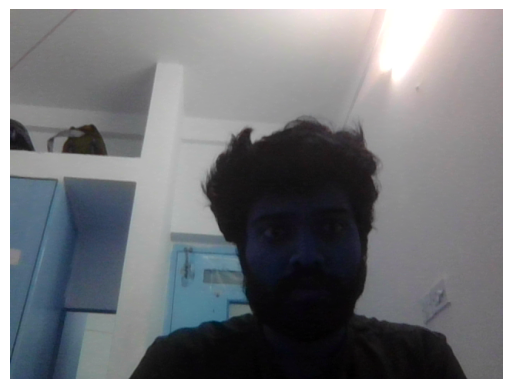

In [34]:
import matplotlib.pyplot as plt
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break 
    plt.imshow(frame)
    plt.axis("off")
    
    


ffmpeg version 5.1.2-3ubuntu1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 12 (Ubuntu 12.2.0-14ubuntu2)
  configuration: --prefix=/usr --extra-version=3ubuntu1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libglslang --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librist --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtheora --enable-libtwolame --enable-libvidstab -

TypeError: Image data of dtype <U10 cannot be converted to float

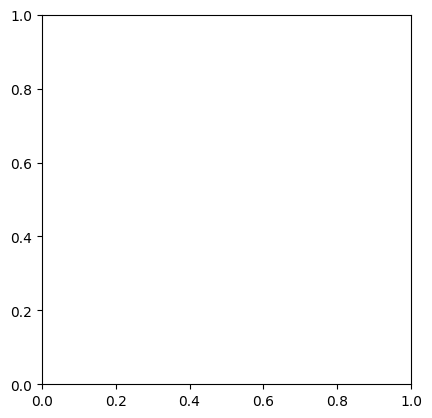

In [31]:
import subprocess
import matplotlib.pyplot as plt
while True:
    command = [
        "ffmpeg",
        "-f", "v4l2",
        "-i", "/dev/video0",
        "-vframes", "1",
        "-o", "output.jpg"
    ]

    subprocess.run(command)
    plt.imshow("output.jpg")
    plt.axis("off")
    

In [19]:
(1/12)*1000

83.33333333333333

In [ ]:
import threading
import subprocess
import cv2

def run_camera():
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Error: Camera could not be opened in run_camera.")
        return
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        # Optionally do something with the frame (or simply pass)
    cap.release()

def record_simultaneously():
    print("Recording in...\n")
    ffmpeg_command = [
        "ffmpeg",
        "-f", "v4l2",
        "-i", "/dev/video0",  # Read from camera
        "-c:v", "libx264",
        "-preset", "ultrafast",
        "-t", "10",          # Record for 10 seconds
        "output.mp4"         # Save output as output.mp4
    ]

    process = subprocess.Popen(ffmpeg_command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    print("Recording started! Press Ctrl+C to stop.")

    try:
        stdout, stderr = process.communicate()  # Wait for FFmpeg to finish and capture output
        print("FFmpeg stdout:", stdout.decode())
        print("FFmpeg stderr:", stderr.decode())
    except KeyboardInterrupt:
        print("Stopping recording...")
        process.terminate()

    print("Recording saved as output.mp4")

t1 = threading.Thread(target=run_camera)
t2 = threading.Thread(target=record_simultaneously)

t1.start()
t2.start()

t1.join()
t2.join()


Recording started! Press Ctrl+C to stop.


Recording saved as output.mp4


In [1]:
import threading
import subprocess
import cv2

def run_camera():
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Error: Camera could not be opened in run_camera.")
        return
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        # Optionally do something with the frame (or simply pass)
    cap.release()

def record_simultaneously():
    print("Recording in...\n")
    ffmpeg_command = [
        "ffmpeg",
        "-f", "v4l2",
        "-i", "/dev/video0",  # Read from camera
        "-c:v", "libx264",
        "-preset", "ultrafast",
        "-t", "10",          # Record for 10 seconds
        "output.mp4"         # Save output as output.mp4
    ]

    process = subprocess.Popen(ffmpeg_command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    print("Recording started! Press Ctrl+C to stop.")

    try:
        stdout, stderr = process.communicate()  # Wait for FFmpeg to finish and capture output
        print("FFmpeg stdout:", stdout.decode())
        print("FFmpeg stderr:", stderr.decode())
    except KeyboardInterrupt:
        print("Stopping recording...")
        process.terminate()

    print("Recording saved as output.mp4")

t1 = threading.Thread(target=run_camera)
t2 = threading.Thread(target=record_simultaneously)

t1.start()
t2.start()

t1.join()
t2.join()


Recording in...

Recording started! Press Ctrl+C to stop.
FFmpeg stdout: 
FFmpeg stderr: ffmpeg version 5.1.2-3ubuntu1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 12 (Ubuntu 12.2.0-14ubuntu2)
  configuration: --prefix=/usr --extra-version=3ubuntu1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libglslang --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librist --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enab

[ WARN:0@1.377] global ./modules/videoio/src/cap_gstreamer.cpp (1405) open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


KeyboardInterrupt: 

In [11]:
import os
import numpy as np
import cv2
from tensorflow import keras
from tensorflow.keras.preprocessing.image import img_to_array

# Load the model
model = keras.models.load_model("model/model.keras")

# Labels
labels = ["BOTTLE", "NO"]

def predict_image(img):
    # Resize using OpenCV
    resized_img = cv2.resize(img, (224, 224))
    
    # Convert BGR (OpenCV format) to RGB (what the model expects)
    resized_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)

    # Convert to float32 and normalize
    img_array = img_to_array(resized_img) / 255.0  
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    predictions = model.predict(img_array)[0][0]
    predictions_full = model.predict(img_array)

    print(predictions_full)

    # Determine predicted class
    predicted_class = labels[int(predictions > 0.5)]

    # Print result
    print(f"✅ Predicted Class: {predicted_class}")
    print(f"✅ Confidence Score: {predictions:.4f}")
    return predicted_class

# Load image using OpenCV
img = cv2.imread("testing_photos/E0.jpg")
predict_image(img)


2025-04-15 02:45:30.104273: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/raghavendra/.local/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 62 variables whereas the saved optimizer has 122 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
I0000 00:00:1744665348.865386   16903 service.cc:152] XLA service 0x7289b4036080 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744665348.865652   16903 service.cc:160]   StreamExecutor device (0): Host, Default Version
2025-04-15 02:45:49.115454: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reprodu

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
[[0.10131747]]
✅ Predicted Class: BOTTLE
✅ Confidence Score: 0.1013


'BOTTLE'

In [12]:
import cv2

def show_webcam():
    # Open the default webcam (0 is typically the default camera)
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("❌ Could not open webcam.")
        return

    print("📷 Press 'q' to quit the video window.")

    while True:
        # Read a frame from the webcam
        ret, frame = cap.read()
        
        if not ret:
            print("❌ Failed to grab frame.")
            break
        predict_image(frame)

        # Display the captured frame
        cv2.imshow("Live Webcam Feed", frame)

        # Press 'q' key to exit the loop
        if cv2.waitKey(1) & 0xFF == ord('q'):
            print("🛑 Quitting the webcam display.")
            break

    # Release the video capture object and close all windows
    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    show_webcam()


❌ Could not open webcam.


[ WARN:0@47.663] global cap_v4l.cpp:913 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@47.664] global obsensor_uvc_stream_channel.cpp:158 getStreamChannelGroup Camera index out of range


In [14]:
cap = cv2.VideoCapture(0)
cap.release()
cv2.destroyAllWindows()

[ WARN:0@60.402] global cap_v4l.cpp:913 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@60.403] global obsensor_uvc_stream_channel.cpp:158 getStreamChannelGroup Camera index out of range


In [21]:
def capture_from_camera():
    global FRAME_CHECKING, TOOK_FOR_TESTING

    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("[ERROR] Could not open camera.")
        return

    last_capture_time = time.time()
    recording = False
    record_start_time = None
    out = None

    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    print("[INFO] Camera started. Press Ctrl+C to stop...")

    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                print("[ERROR] Failed to capture frame.")
                break

            current_time = time.time()

            if not recording:
                result = predict_image(frame)
                if result == "BOTTLE":
                    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
                    video_name = f"recording_{timestamp}.avi"
                    video_path = os.path.join(video_output_dir, video_name)

                    print("[INFO] BOTTLE detected – starting recording...")
                    recording = True
                    record_start_time = current_time

                    fourcc = cv2.VideoWriter_fourcc(*'XVID')
                    out = cv2.VideoWriter(video_path, fourcc, fps, (frame_width, frame_height))
            else:
                out.write(frame)
                FRAME_CHECKING = frame

                if not TOOK_FOR_TESTING:
                    TOOK_FOR_TESTING = True
                    threading.Thread(target=emergency_senders, args=(video_name,)).start()

                if current_time - record_start_time >= capture_interval:
                    print("[INFO] Recording complete.")
                    recording = False
                    if out:
                        out.release()

                    video_path = os.path.join(video_output_dir, video_name)
                    threading.Thread(
                        target=PassVideo(url=VIDEO_UPLOAD_URL, video_path=video_path).send,
                        args=(USER_ID,)
                    ).start()

            if not recording and current_time - last_capture_time >= capture_interval:
                timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
                threading.Thread(target=inference_worker, args=(frame.copy(), timestamp)).start()
                last_capture_time = current_time

            time.sleep(0.01)

    except KeyboardInterrupt:
        print("\n[INFO] Keyboard interrupt received. Exiting...")

    finally:
        print("[INFO] Releasing resources...")
        if cap:
            cap.release()
        if out:
            out.release()
        print("[INFO] Done.")
